<a href="https://colab.research.google.com/github/magdakhurtsilava/Python_for_trading/blob/main/_Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import datetime as dt 
import pandas as pd 
import numpy as np


# download data

In [ ]:
symbols = ["AAPL", "FB"]
df = yf.download(symbols,start= "2018-01-01",end="2020-01-01",interval="1mo")["Adj Close"].dropna()


[*********************100%***********************]  2 of 2 completed


In [ ]:
df

,AAPL,FB
Date,,
2018-01-01,40.033,186.89
2018-02-01,42.589,178.32
2018-03-01,40.281,159.79
2018-04-01,39.676,172.0
2018-05-01,44.864,191.78
2018-06-01,44.612,194.32
2018-07-01,45.861,172.58
2018-08-01,54.86,175.73
2018-09-01,54.595,164.46


#Adding return columns - 

In [ ]:
def add_return_columns(symbols):
  pd.options.display.float_format = '{:.5}'.format
  for symbol in symbols:
    df[f"{symbol} return"] = df[symbol] / df[symbol].shift(1)- 1

In [ ]:
add_return_columns(symbols)

In [ ]:
df.dropna()

,AAPL,FB,AAPL return,FB return
Date,,,,
2018-02-01,42.589,178.32,0.063848,-0.045856
2018-03-01,40.281,159.79,-0.05421,-0.10391
2018-04-01,39.676,172.0,-0.015019,0.076413
2018-05-01,44.864,191.78,0.13076,0.115
2018-06-01,44.612,194.32,-0.0055985,0.013244
2018-07-01,45.861,172.58,0.027983,-0.11188
2018-08-01,54.86,175.73,0.19623,0.018252
2018-09-01,54.595,164.46,-0.004825,-0.064132
2018-10-01,52.931,151.79,-0.030478,-0.07704


In [ ]:
df = df[["AAPL return","FB return"]].dropna()
df.corr()

,AAPL return,FB return
AAPL return,1.0,0.51166
FB return,0.51166,1.0


# Creating Stat-Board


In [ ]:
def stat_board(symbols):
  columns = [
             "annualized_mean_return",
             "annualized_stdv",
             "sharp_ratio"
  ]
  board = pd.DataFrame(index=columns)
  for symbol in symbols:
    board[symbol] = [
                     df[f"{symbol} return"].mean() * 12,
                     df[f"{symbol} return"].std() * np.sqrt(12),
                     (df[f"{symbol} return"].mean() * 12) / (df[f"{symbol} return"].std() * np.sqrt(12))
    ]
  return board
board = stat_board(symbols)
board

,AAPL,FB
annualized_mean_return,0.36121,0.096183
annualized_stdv,0.31645,0.3236
sharp_ratio,1.1414,0.29723


# Create Portfolio Board

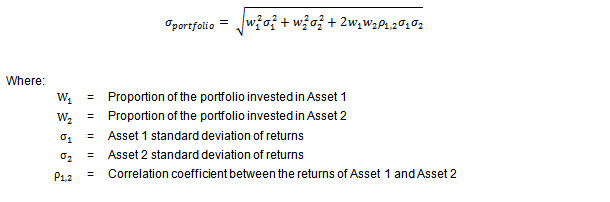

In [ ]:
w = [0.5,0.5]
mean = board[symbols[0]].annualized_mean_return * w[0] + board[symbols[1]].annualized_mean_return * w[1]
covariance = df[f"{symbols[0]} return"].cov(df[f"{symbols[1]} return"])

std = np.sqrt(
    w[0]**2 * board[symbols[0]].annualized_stdv**2 +
    w[1]**2 * board[symbols[1]].annualized_stdv**2 +
    2 * w[0] * w[1] * covariance
)
sr = mean / std

def portfolio_board(symbols):
  print('Portfolio weights:\n', w)
  columns = [
             "portfolio_annualized_mean",
             "portfolio_annualized_std",
             "portfolio_sharp_ratio"
  ]
  portfolio_board = pd.DataFrame(index=columns)
  portfolio_board["portfolio stat"] = [
                                       mean,
                                       std,
                                       sr
  ]
  print(portfolio_board)

portfolio_board(symbols)



Portfolio weights:
 [0.5, 0.5]
                           portfolio stat
portfolio_annualized_mean         0.22869
portfolio_annualized_std          0.23108
portfolio_sharp_ratio             0.98968


# Example of standard deviation

In [ ]:
prices = df["FB return"][:5]
prices

Date
2018-02-01   -0.045856
2018-03-01    -0.10391
2018-04-01    0.076413
2018-05-01       0.115
2018-06-01    0.013244
Name: FB return, dtype: float64

In [ ]:
prices.std()

0.08879438543994914

#Calculate by hand

In [ ]:
# sum
prices_sum = sum(prices)
prices_sum

0.0548870224997865

In [ ]:
# find mean
mean = prices_sum / 5
mean

0.0109774044999573

In [ ]:
# find deviation from the mean 
deviation_from_mean = prices - mean
deviation_from_mean

Date
2018-02-01   -0.056833
2018-03-01    -0.11489
2018-04-01    0.065435
2018-05-01     0.10402
2018-06-01    0.002267
Name: FB return, dtype: float64

In [ ]:
# square each deviation from the mean 
deviation_squares = deviation_from_mean ** 2
deviation_squares

Date
2018-02-01      0.00323
2018-03-01       0.0132
2018-04-01    0.0042818
2018-05-01     0.010821
2018-06-01   5.1392e-06
Name: FB return, dtype: float64

In [ ]:
# find the sum of squares
squares_sum = sum(deviation_squares)
squares_sum

0.03153777154263301

In [ ]:
# find the variance
variance = squares_sum / (5-1)
variance

0.007884442885658252

In [ ]:
# find the square root from the variance
stdv = np.sqrt(variance)
stdv

0.08879438543994914